In [ ]:
import silq
silq.initialize('Antimony')

%matplotlib notebook

In [19]:
sim_gui(mini=True)

# auto-tune (not working)

In [13]:
# Calibration parameter
from silq.tests.test_parameters import GaussianParameter, Gaussian2DParameter
from silq.measurements.measurement_modules import *
from silq.measurements.measurement_types import *
from silq.parameters.measurement_parameters import MeasurementSequenceParameter

set_parameters = [TGAC, DF]
measurements = [
    Loop0DMeasurement('measure_contrast', 
                      acquisition_parameter=EPR_parameter,
                      discriminant='contrast'),
    Loop2DMeasurement('fine_loop_contrast', step_percentage=10, points=5, 
                      acquisition_parameter=EPR_parameter,
                      discriminant='contrast',
                      set_parameters=set_parameters),
    Loop2DMeasurement('coarse_loop_contrast', step_percentage=10, points=9, 
                      acquisition_parameter=EPR_parameter,
                      discriminant='contrast',
                      set_parameters=set_parameters)]

measurement_sequence = MeasurementSequence(
    'retune', measurements=measurements, 
    acquisition_parameter=EPR_parameter,
    condition_sets=[
        ConditionSet(('contrast', '>', 0.3), on_success='success', update=True),
        ConditionSet(('contrast', '>', 0.2), on_success='next_success', update=True)],
    silent=False)

retune_parameter = MeasurementSequenceParameter(
    'retune_parameter', 
    measurement_sequence,
    set_parameters=set_parameters)

In [21]:
EPR_parameter.temporary_settings(save_traces=True)
retune_parameter()

Performing measure_contrast measurement
Performing fine_loop_contrast measurement
Updating set parameters to optimal values: {'TGAC': -0.36819999999999997, 'DF': -0.21879999999999999}
Finished measurements


(2, [-0.36819999999999997, -0.21879999999999999], 1.0)

In [27]:
measurement_sequence()

Performing measure_contrast measurement
Performing fine_loop_contrast measurement
Updating set parameters to optimal values: {'TGAC': -0.36155000000000004, 'DF': -0.22039999999999998}
Finished measurements


{'action': 'success',
 'is_satisfied': True,
 'satisfied_arr': array([[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False,  True, False],
        [False, False, False, False, False],
        [False, False, False,  True, False]], dtype=bool)}

# DC scans

## Turnon

In [ ]:
vals = list(np.arange(0, 1.4, 0.002))
len(vals)

In [ ]:
DC_parameter.setup()
loop = Loop(turnon_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name='turnon')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()

## Pinchoff

In [ ]:
pinchoff_parameter = LB

vals = list(np.arange(1.25, 0, -0.002))

turnon_parameter(vals[0])
len(vals)

In [ ]:
DC_parameter.setup()
loop = Loop(pinchoff_parameter[vals]).each(
    DC_parameter)
data = loop.get_data_set(name=f'pinchoff_{pinchoff_parameter.name}')
plot = loop.plot(data.DC_voltage)

loop.run();

layout.stop()

## 1D DC scan

In [ ]:
vals = TGAC.sweep(0.14, 0.167, step=0.0005)
len(vals)

In [ ]:
DC_parameter.setup()
loop = Loop(vals).each(
    DC_parameter)
data = loop.get_data_set(name=f'1D_coulomb_{parameter.name}')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()
vals.parameter(vals[0])

## 2D DC scan

In [9]:
x_vals = DF.sweep(-0.58, -0.48,  step=0.002)
y_vals = TGAC.sweep(-0.5, -0.4, step=0.002)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X51 x Y51


In [ ]:
DC_parameter.setup()
loop = Loop(y_vals).loop(
    x_vals).each(
        DC_parameter)
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
plot = loop[0].plot(data.DC_voltage)
loop.run()

layout.stop()
# x_vals.parameter(x_vals[0])
# y_vals.parameter(y_vals[0])

## Continuous single point scan

In [ ]:
DC_parameter.setup()
loop = Loop(dummy_parameter[0:5000:1], delay=0.2).each(DC_parameter)
data = loop.get_data_set(name='single_point_scan')
plot = loop.plot(data.DC_voltage)
loop.run()

# Variable read

## Settings

In [ ]:
read_pulse = variable_read_parameter.pulse_sequence['read']
read_voltage = parameters.AttributeParameter(read_pulse, attribute='amplitude')

In [ ]:
variable_read_parameter.pulse_sequence['plunge'].duration = 2
variable_read_parameter.pulse_sequence['read'].duration = 4
variable_read_parameter.pulse_sequence['empty'].duration = 2
variable_read_parameter.pulse_sequence['final'].duration = 0.25

variable_read_parameter.pulse_sequence['plunge'].amplitude = 0.005
variable_read_parameter.pulse_sequence['read'].amplitude = 0
variable_read_parameter.pulse_sequence['empty'].amplitude = -0.005
variable_read_parameter.pulse_sequence['final'].amplitude = -0.005
variable_read_parameter.pulse_sequence

In [21]:
variable_read_parameter.pulse_sequence['plunge'].duration = 4
variable_read_parameter.pulse_sequence['read'].duration = 16
variable_read_parameter.pulse_sequence['empty'].duration = 4
variable_read_parameter.pulse_sequence['final'].duration = 0.25

variable_read_parameter.pulse_sequence['plunge'].amplitude = 0.005
variable_read_parameter.pulse_sequence['read'].amplitude = 0
variable_read_parameter.pulse_sequence['empty'].amplitude = -0.005
variable_read_parameter.pulse_sequence['final'].amplitude = -0.005
variable_read_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 24.25
	DCPulse(plunge, A=0.005, t_start=0, t_stop=4)
	DCPulse(read, A=0, t_start=4, t_stop=20)
	DCPulse(empty, A=-0.005, t_start=20, t_stop=24)
	DCPulse(final, A=-0.005, t_start=24, t_stop=24.25)

## Scan

<IPython.core.display.Javascript object>


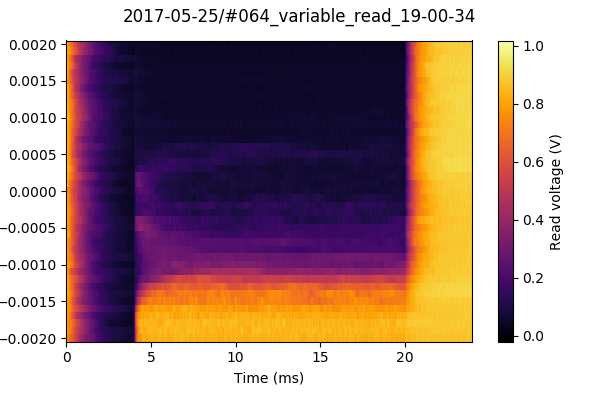

DataSet:
   data = load_data('2017-05-25/#064_variable_read_19-00-34')
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | amplitude_set | amplitude    | (41,)
   Setpoint | time_set      | time         | (41, 12000)
   Measured | read_voltage  | read_voltage | (41, 12000)
Started at 2017-05-25 19:00:36
Finished at 2017-05-25 19:06:03


In [22]:
variable_read_parameter.setup(samples=200)
loop = Loop(read_voltage.sweep(0.002, -0.002, num=41)).each(
    variable_read_parameter)
data = loop.get_data_set(name=f'variable_read')
plot = loop.plot(data.read_voltage)
loop.run();

# Live DC scan

## Settings

In [2]:
DC_sweep_parameter.pulse_duration = .1
DC_sweep_parameter.trace_pulse.duration = 20
DC_sweep_parameter.final_delay = 120

DC_sweep_parameter.trace_pulse.enabled = True
DC_sweep_parameter.trace_pulse.connection_label = 'TGAC'

DC_sweep_parameter.sweep_parameters.clear()
DC_sweep_parameter.add_sweep('TGAC', np.linspace(-0.025, 0.025, 22), connection_label='TGAC')
DC_sweep_parameter.add_sweep('DF', np.linspace(-0.025, 0.025, 22), connection_label='DF')

print(f'pulses: {len(DC_sweep_parameter.pulse_sequence)}')

pulses: 507


## Scan

Wall time: 15.1 s


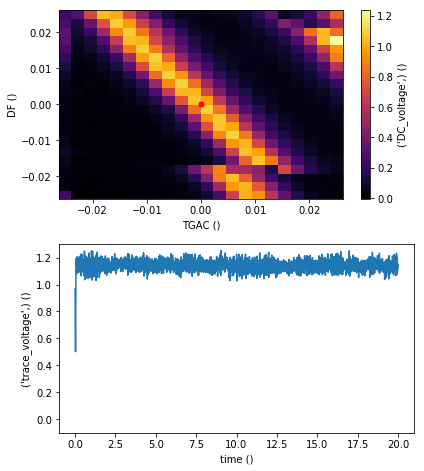

In [17]:
%time plot = DCSweepPlot(DC_sweep_parameter, auto_start=True)

In [18]:
plot.stop()

In [8]:
plt.xlim(0, 10)
plt.ylim(-0.05, 1.2)

(-0.05, 1.2)

## Analyse single trace

In [ ]:
from silq.analysis.analysis import *
traces = DC_sweep_parameter.data['trace']['output']
result = find_high_low(traces, threshold_method='6*std_low')
low, high = result['low'], result['high']
high.pop('traces')
low.pop('traces')
print(f'High: {high}')
print(f'Low: {low}')
SNR = result['voltage_difference'] / np.sqrt(high['std'] ** 2 + low['std'] ** 2)
print(f'SNR: {SNR}, threshold_voltage: {result["threshold_voltage"]}')

In [ ]:
traces = DC_sweep_parameter.data['trace']['output'][:5000]
traces_diff = np.diff(traces)

fig, axes = plt.subplots(2)
axes[0].plot(traces)
axes[1].plot(traces_diff)

# Calibration

## Settings

In [5]:
EPR_parameter.t_skip = 0.0
EPR_parameter.t_read = 0.8
EPR_parameter.pulse_sequence['plunge'].duration = 1
EPR_parameter.pulse_sequence['read_long'].duration = 8
EPR_parameter.pulse_sequence['empty'].duration = 1
EPR_parameter.pulse_sequence['plunge'].amplitude = 0.005
EPR_parameter.pulse_sequence['empty'].amplitude = -0.005
EPR_parameter.pulse_sequence['final'].t_start = PulseMatch(EPR_parameter.pulse_sequence['read_long'], 't_stop')
EPR_parameter.pulse_sequence['final'].duration = 0.25
EPR_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 10.25
	DCPulse(empty, A=-0.005, t_start=0, t_stop=1)
	DCPulse(plunge, A=0.005, t_start=1, t_stop=2)
	DCPulse(read_long, A=0, t_start=2, t_stop=10)
	DCPulse(final, A=0, t_start=10, t_stop=10.25)

## Single scan

In [14]:
EPR_parameter.single_settings(silent=False, samples=200, save_traces=True)
data = Measure(EPR_parameter).run(name='single_EPR')

contrast: 0.308
dark_counts: 0.164
voltage_difference: 1.005
fidelity_empty: 1.000
fidelity_load: 1.000
DataSet:
   data = load_data('2017-05-26/#018_single_EPR_15-40-14')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | single_set         | single             | (1,)
   Measured | contrast           | contrast           | (1,)
   Measured | dark_counts        | dark_counts        | (1,)
   Measured | voltage_difference | voltage_difference | (1,)
   Measured | fidelity_empty     | fidelity_empty     | (1,)
   Measured | fidelity_load      | fidelity_load      | (1,)
acquired at 2017-05-26 15:40:18


<IPython.core.display.Javascript object>


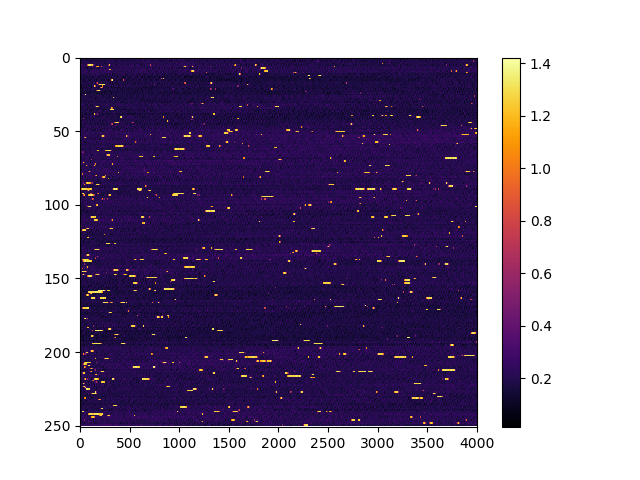

In [15]:
# fig, axes = plt.subplots(1, 2, figsize=(10,3))
plot_traces(EPR_parameter.data['read_long']['output'])#, ax=axes[0])
# plot_traces(EPR_parameter.data['read_long']['output'] > 0.44, ax=axes[1])

## Continuous scan

False


<IPython.core.display.Javascript object>


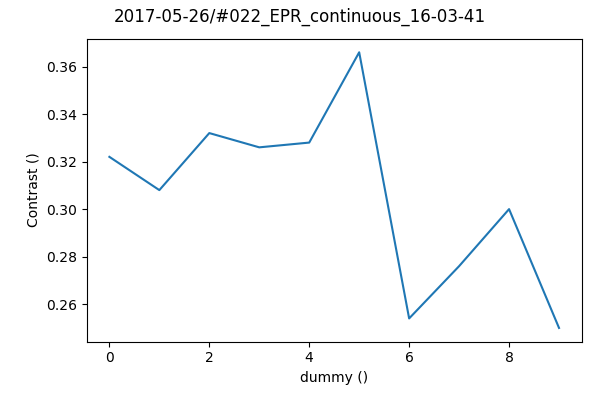

DataSet:
   data = load_data('2017-05-26/#022_EPR_continuous_16-03-41')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | dummy_set          | dummy              | (10,)
   Measured | contrast           | contrast           | (10,)
   Measured | dark_counts        | dark_counts        | (10,)
   Measured | voltage_difference | voltage_difference | (10,)
   Measured | fidelity_empty     | fidelity_empty     | (10,)
   Measured | fidelity_load      | fidelity_load      | (10,)
Started at 2017-05-26 16:03:42
Finished at 2017-05-26 16:05:11
 

In [25]:
layout.stop()
EPR_parameter.clear_settings()
print(EPR_parameter.continuous)

loop = Loop(dummy_parameter[0:10:1]).each(EPR_parameter)
data = loop.get_data_set(name='EPR_continuous')
loop.plot(data.contrast)
%prun loop.run()


<IPython.core.display.Javascript object>


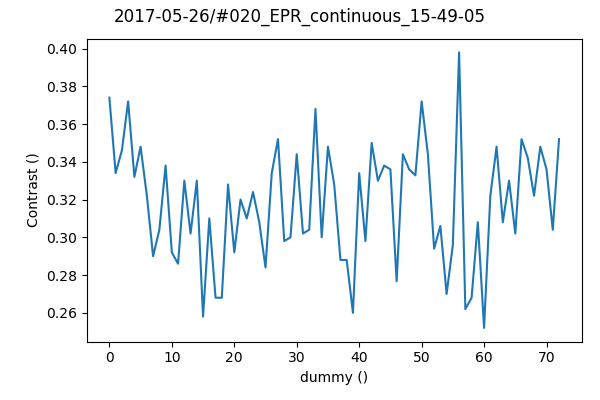

DataSet:
   data = load_data('2017-05-26/#020_EPR_continuous_15-49-05')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | dummy_set          | dummy              | (100,)
   Measured | contrast           | contrast           | (100,)
   Measured | dark_counts        | dark_counts        | (100,)
   Measured | voltage_difference | voltage_difference | (100,)
   Measured | fidelity_empty     | fidelity_empty     | (100,)
   Measured | fidelity_load      | fidelity_load      | (100,)
Started at 2017-05-26 15:49:06
Finished at 2017-05-26 15:56:48


KeyboardInterrupt: 

In [23]:
EPR_parameter.temporary_settings(continuous=True, samples=500)
EPR_parameter.setup()

loop = Loop(dummy_parameter[0:100:1]).each(EPR_parameter)
data = loop.get_data_set(name='EPR_continuous')
loop.plot(data.contrast)
loop.run()

layout.stop()
EPR_parameter.clear_settings()

## 2D scan

In [22]:
# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=10, points=7)

<IPython.core.display.Javascript object>


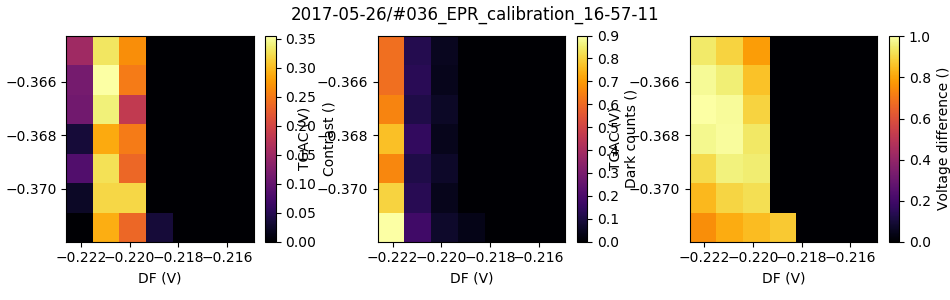

DataSet:
   data = load_data('2017-05-26/#036_EPR_calibration_16-57-11')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | TGAC_set           | TGAC               | (7,)
   Setpoint | DF_set             | DF                 | (7, 7)
   Measured | contrast           | contrast           | (7, 7)
   Measured | dark_counts        | dark_counts        | (7, 7)
   Measured | voltage_difference | voltage_difference | (7, 7)
   Measured | fidelity_empty     | fidelity_empty     | (7, 7)
   Measured | fidelity_load      | fidelity_load      | (7, 7)
Started at 2017-05-26 16:57:13
Finished at 2017-05-26 16:59:55


In [23]:
EPR_parameter.samples=250
EPR_parameter.temporary_settings(continuous=True)
EPR_parameter.setup()
loop = Loop(
    y_sweep).loop(
        x_sweep).each(
            EPR_parameter)

data =  loop.get_data_set(name='EPR_calibration')

loop[0].plot(data.contrast, data.dark_counts, data.voltage_difference, figsize=(9.5, 3))
loop.run();

layout.stop()
EPR_parameter.clear_settings()

## read duration calibration

In [ ]:
read_duration_parameter = parameters.AttributeParameter(EPR_parameter, 't_read')

In [ ]:
EPR_parameter.temporary_settings(samples=500, continuous=True)
EPR_parameter.setup()
loop = Loop(
    read_duration_parameter.sweep(0.1, 1.5, num=25)).each(
        EPR_parameter)
data =  loop.get_data_set(name='EPR_calibration_t_read')

plot = qc.MatPlot(figsize=(10, 3), subplots=(1, 3))
plot[0].add(data.contrast)
plot[1].add(data.dark_counts)
plot[2].add(data.voltage_difference)
plt.tight_layout()

loop.with_bg_task(plot.update).run()

layout.stop()
EPR_parameter.clear_settings()

# Adiabatic sweeping

In [38]:
adiabatic_ESR_parameter.t_skip = 0.0
adiabatic_ESR_parameter.t_read = 0.8

## Single scan

In [ ]:
old_pseq = adiabatic_ESR_parameter.pulse_sequence

In [ ]:
EPR_parameter.pulse_sequence

In [ ]:
adiabatic_ESR_parameter.pulse_sequence['empty'].enabled=True
pulses = ['empty', 'plunge', 'read_long', 'final']
durations = [0.25, 1, 10, 0.25]

adiabatic_ESR_parameter.pulse_sequence['empty'].enabled=False
pulses = ['plunge', 'read_long', 'final']
durations = [0.3, 10, 0.25]

t = 0
for duration, pulse in zip(durations, pulses):
    adiabatic_ESR_parameter.pulse_sequence[pulse].t_start = t
    adiabatic_ESR_parameter.pulse_sequence[pulse].duration = duration
    t += duration
    
adiabatic_ESR_parameter.pulse_sequence.sort()
adiabatic_ESR_parameter.pulse_sequence

In [ ]:
adiabatic_ESR_parameter.single_settings(samples=200, continuous=False, silent=False)
adiabatic_ESR_parameter()

fig, axes = plt.subplots(1, 2, figsize=(10,3))
plot_traces(adiabatic_ESR_parameter.data['read_long']['output'], ax=axes[0])
plot_traces(adiabatic_ESR_parameter.data['read_long']['output'] > 0.24, ax=axes[1])

## Center frequency scan

In [39]:
adiabatic_freq_parameter = parameters.AttributeParameter(
    adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'], 'frequency')

In [40]:
vals = adiabatic_freq_parameter.sweep(39.0e9, 39.4e9, step=0.5e6)
print(f'Sweep vals: {len(vals)}')

Sweep vals: 801


In [41]:
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].frequency_deviation = 2e6
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].power = 0
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].t_start = 0.4
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].duration = 0.2

adiabatic_ESR_parameter.pulse_sequence['plunge'].duration = 2

adiabatic_ESR_parameter.pulse_sequence['final'].t_start = 12
adiabatic_ESR_parameter.pulse_sequence.sort()
adiabatic_ESR_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 12.25
	DCPulse(plunge, A=0.01, t_start=0, t_stop=2)
	FrequencyRampPulse(adiabatic_ESR, frequency=39000.00 MHz, frequency_deviation=2.00, power=0, t_start=0.4, t_stop=0.6)
	DCPulse(read_long, A=0, t_start=2, t_stop=12)
	DCPulse(final, A=0, t_start=12, t_stop=12.25)

In [42]:
adiabatic_freq_parameter(41e9)

In [ ]:
adiabatic_ESR_parameter.samples = 100

loop = Loop(
    vals).each(
        adiabatic_ESR_parameter,
        Task(measurement_sequence))
data = loop.get_data_set(name='adiabatic_ESR_f_center')
loop.plot(data.contrast, data.dark_counts, figsize=(8,3))

loop.run()

# T1

In [ ]:
# Calculate T1 durations (shuffled)
T1_wait_times = list(np.logspace(1, 3.7, num=12, base=10))
# np.random.shuffle(T1_wait_times)
print('Shuffled T1 wait times: {}'.format(T1_wait_times))

In [ ]:
T1_parameter.pulse_sequence['read'].duration = 10

In [ ]:
T1_duration_parameter = parameters.AttributeParameter(T1_parameter.pulse_sequence['plunge'], 'duration')

T1_parameter.t_skip = 0

In [ ]:
T1_duration_parameter(20)

In [ ]:
T1_parameter.readout_threshold_voltage=0.3

In [ ]:
T1_parameter.single_settings(silent=False, samples=200)
T1_parameter()

In [ ]:
plot_traces(T1_parameter.data['read']['output'])

In [ ]:
T1_parameter.samples = 30
EPR_parameter.samples = 500
data = qc.Loop(
    dummy_parameter[0:80:1]).each(
    EPR_parameter,
    qc.Loop(T1_parameter[T1_wait_times]).each(T1_parameter),
                    ).run(name='T1_data', progress_interval=True)

# Determine optimal t_read

In [22]:
from silq.analysis.analysis import *
def optimal_t_read(traces, sample_rate, start_idx=0):
    dt = 1/sample_rate
    t_list = np.linspace(0, (traces.shape[1]-1)*dt, traces.shape[1])
    t_total = t_list[-1]
    
    t_read_percentages = np.arange(1, 30)
    contrast = np.zeros(len(t_read_percentages))
    t_read_arr = np.zeros(len(t_read_percentages))
    for k, t_read_perc in enumerate(t_read_percentages):
        t_read_arr[k] = t_read_perc / 100 * t_total
        read_pts = int(len(t_list) / 100 * t_read_perc)
        
        read_high_low = find_high_low(traces,
                                      threshold_method='config')
        threshold_voltage = read_high_low['threshold_voltage']
        voltage_difference = read_high_low['voltage_difference']

        read_segment1 = traces[:, :read_pts]
        read_segment2 = traces[:, -read_pts:]

        results1 = analyse_read(read_segment1, start_idx=start_idx,
                                threshold_voltage=threshold_voltage,
                                filter_loaded=True)
        up_proportion = results1['up_proportion']
        dark_counts = analyse_read(read_segment2, start_idx=start_idx,
                                   threshold_voltage=threshold_voltage,
                                   filter_loaded=False)['up_proportion']
        contrast[k] = up_proportion - dark_counts
    return t_read_arr, contrast

<IPython.core.display.Javascript object>


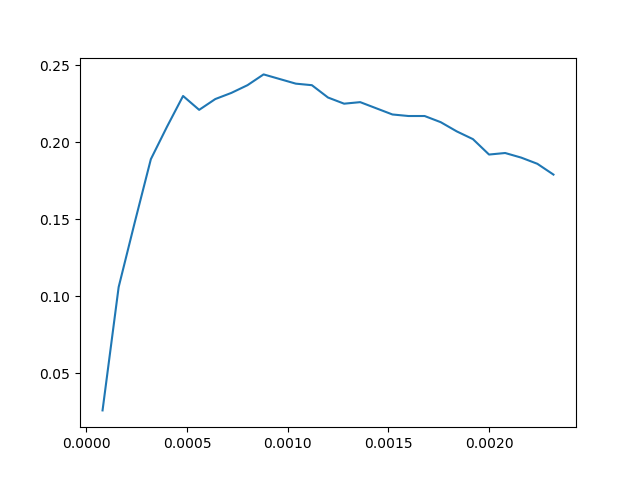

In [23]:
t_read_arr, contrast = optimal_t_read(EPR_parameter.data['read_long']['output'], 500e3)

plt.figure()
plt.plot(t_read_arr, contrast)

# Batch measurements

In [26]:
# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=10, points=13)

big_loop = Loop(
    y_sweep).loop(
        x_sweep).each(
            EPR_parameter)

# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=10, points=5)

fine_loop = Loop(
    y_sweep).loop(
        x_sweep).each(
            EPR_parameter)

In [ ]:
EPR_parameter.samples=500
EPR_parameter.temporary_settings(continuous=False)
# EPR_parameter.setup()
loop = Loop(dummy_parameter[0:300:1]).each(
    Loop(dummy_parameter[0:10:1]).each(
        fine_loop,
        big_loop),
    Loop(dummy_parameter[0:10:1]).each(
        qc.Wait(180),
        fine_loop,
        big_loop),
    qc.Wait(3600))
data =  loop.get_data_set(name='EPR_batch')

# loop[0].plot(data.contrast, data.dark_counts, data.voltage_difference, figsize=(9.5, 3))
loop.run();

layout.stop()
EPR_parameter.clear_settings()

DataSet:
   data = load_data('2017-05-29/#001_EPR_batch_09-25-14')
   <Type>   | <array_id>                   | <array.name>       | <array.shape>
   Setpoint | dummy_set                    | dummy              | (300,)
   Setpoint | dummy_set_0                  | dummy              | (300, 10)
   Setpoint | TGAC_set_0_0                 | TGAC               | (300, 10, 5)
   Setpoint | DF_set_0_0_0                 | DF                 | (300, 10, 5, 5)
   Measured | contrast_0_0_0_0_0           | contrast           | (300, 10, 5, 5)
   Measured | dark_counts_0_0_0_0_1        | dark_counts        | (300, 10, 5, 5)
   Measured | voltage_difference_0_0_0_0_2 | voltage_difference | (300, 10, 5, 5)
   Measured | fidelity_empty_0_0_0_0_3     | fidelity_empty     | (300, 10, 5, 5)
   Measured | fidelity_load_0_0_0_0_4      | fidelity_load      | (300, 10, 5, 5)
   Setpoint | TGAC_set_0_1                 | TGAC               | (300, 10, 13)
   Setpoint | DF_set_0_1_0                 | DF      